## 01.Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
sns.set()

 ## 02.Understanding Data

In [139]:
#Read the csv file
import pandas as pd
df = pd.read_csv('netflix_india_shows_and_movies.csv') 

df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   showid              6698 non-null   int64  
 1   name                6698 non-null   object 
 2   type                6698 non-null   object 
 3   rating              6698 non-null   object 
 4   duration            6698 non-null   object 
 5   description         6698 non-null   object 
 6   hook_text           3165 non-null   object 
 7   genre               6698 non-null   object 
 8   release_year        6685 non-null   float64
 9   release_date        6698 non-null   object 
 10  mood_tag            6051 non-null   object 
 11  actors              6031 non-null   object 
 12  creator             1174 non-null   object 
 13  director            4260 non-null   object 
 14  audio               3998 non-null   object 
 15  subtitles           3997 non-null   object 
 16  tags  

In [58]:
df.shape

(6698, 19)

In [108]:
df.head()

showid                    name      type   rating  duration  \
0  81607354        A Killer Paradox  TVSeries        A  1 Season   
1  81616617                   Ashes     Movie        A    1.6667   
2  81732726                Bhakshak     Movie        A      2.25   
3  81611991  Lover, Stalker, Killer     Movie  U/A 16+       1.5   
4  70305903            Interstellar     Movie  U/A 13+    2.8167   

                                         description hook_text        genre  \
0  When one accidental killing leads to another, ...   Unknown     Thriller   
1  From an intoxicating fantasy to a dangerous af...   Unknown        Drama   
2  A struggling local journalist begins a dogged ...   Unknown        Drama   
3  In this twisting documentary, a mechanic tries...   Unknown  Documentary   
4  With humanity teetering on the brink of extinc...   Unknown       Sci-Fi   

  release_date                         mood_tag  ...  \
0   2024-02-09              Offbeat;Suspenseful  ...   
1   2024-02-09  Psychological;Intimate;Romantic  ...   
2   2024-02-09                           Gritty  ...   
3   2024-02-09                          Unknown  ...   
4   2024-02-09            Mind-Bending;Cerebral  ...   

                    creator           director  \
0  Lee Chang-hee;Kim Da-min            Unknown   
1                   Unknown      Erdem Tepegöz   
2                   Unknown             Pulkit   
3                   Unknown      Sam Hobkinson   
4                   Unknown  Christopher Nolan   

                                               audio                subtitles  \
0                                            Unknown                  Unknown   
1  English;Turkish - Audio Description;Turkish [O...  English;English;Turkish   
2  English;Hindi - Audio Description;Hindi [Origi...    English;English;Hindi   
3     English - Audio Description;English [Original]                  English   
4                                 English [Original]            English;Hindi   

                                                tags  \
0  Korean;Crime TV Shows;K-dramas based on Webtoo...   
1                     Turkish;Dramas;Romantic Movies   
2  Hindi-Language Movies;Bollywood Movies;Crime M...   
3  Documentaries;Crime Movies;True Crime Document...   
4  Sci-Fi Movies;Dramas;Action & Adventure Movies...   

                                   similar_titles_id production_country  \
0  81444051;81461539;81011211;81640988;80990668;8...        South Korea   
1  81732726;81256740;81671215;81637260;81566662;8...             Turkey   
2  81671215;81637260;81725616;81637261;81740214;8...              India   
3  81671836;81130130;81620852;81607097;81212487;8...            Unknown   
4  70131314;81198930;80117456;80023689;80244645;8...      United States   

  day_added  year_added  month_added  
0         9        2024            2  
1         9        2024            2  
2         9        2024            2  
3         9        2024            2  
4         9        2024            2  

[5 rows x 21 columns]

#### Attribute Information 
This dataset has 6698 rows and 19 columns

## 03. Data Cleaning

#### 3.1 Check the number of unique values

In [59]:
df.nunique()

showid                6698
name                  6626
type                     2
rating                   5
duration               205
description           6559
hook_text             3119
genre                   20
release_year            56
release_date          1845
mood_tag               987
actors                5694
creator               1061
director              3096
audio                  261
subtitles              125
tags                  3484
similar_titles_id     6685
production_country      57
dtype: int64

#### 3.2 Check the number of duplicates

In [60]:
df.duplicated().sum()

0

#### 3.3 Check the number of null values

In [61]:
df.isnull().sum()

showid                   0
name                     0
type                     0
rating                   0
duration                 0
description              0
hook_text             3533
genre                    0
release_year            13
release_date             0
mood_tag               647
actors                 667
creator               5524
director              2438
audio                 2700
subtitles             2701
tags                     0
similar_titles_id       11
production_country     554
dtype: int64

#### 3.4. Handling the missing values

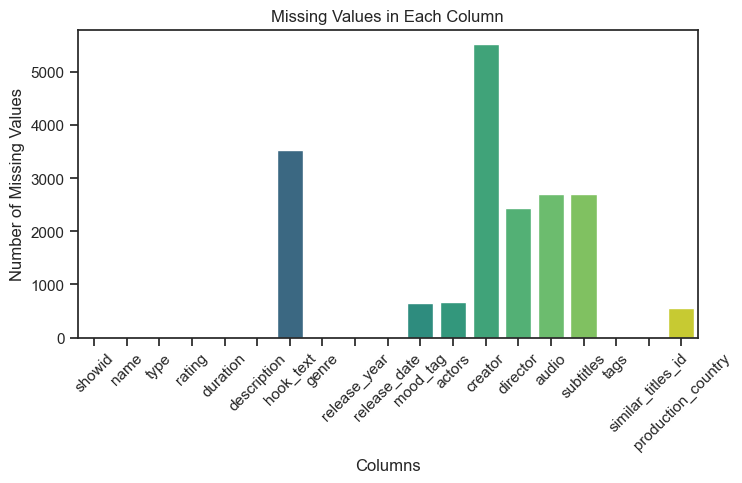

In [62]:
missing_values = df.isnull().sum()

plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


##### 3.4.1 Dropping the records with null release years since there are only 13 records

In [140]:
df.dropna(subset=['release_year'], inplace=True)
df.isnull().sum()

showid                   0
name                     0
type                     0
rating                   0
duration                 0
description              0
hook_text             3524
genre                    0
release_year             0
release_date             0
mood_tag               645
actors                 665
creator               5511
director              2438
audio                 2695
subtitles             2696
tags                     0
similar_titles_id       11
production_country     551
dtype: int64

##### 3.4.2. Impute the mode for missinig values in rating column

In [141]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.isnull().sum()

showid                   0
name                     0
type                     0
rating                   0
duration                 0
description              0
hook_text             3524
genre                    0
release_year             0
release_date             0
mood_tag               645
actors                 665
creator               5511
director              2438
audio                 2695
subtitles             2696
tags                     0
similar_titles_id       11
production_country     551
dtype: int64

##### 3.4.2 Replacing missing values in categorical columns with the tag 'Unknown'

In [142]:
df[['hook_text','mood_tag','actors','creator','director','audio','subtitles','similar_titles_id','production_country']] = df[['hook_text','mood_tag','actors','creator','director','audio','subtitles','similar_titles_id','production_country']].fillna('Unknown')
df.isnull().sum()

showid                0
name                  0
type                  0
rating                0
duration              0
description           0
hook_text             0
genre                 0
release_year          0
release_date          0
mood_tag              0
actors                0
creator               0
director              0
audio                 0
subtitles             0
tags                  0
similar_titles_id     0
production_country    0
dtype: int64

##### 3.4.4. Drop Release year since the Release date column has that data as well

In [143]:
df = df.drop(columns=['release_year'])
df.shape

(6685, 18)

In [144]:
df_copy = df
df_copy["release_date"] = pd.to_datetime(df_copy['release_date'])
df_copy.release_date.value_counts()

release_date
2023-12-31    49
2023-06-30    48
2023-11-30    46
2022-10-31    44
2023-03-31    41
              ..
2019-11-16     1
2021-06-21     1
2019-11-12     1
2022-12-12     1
2018-05-03     1
Name: count, Length: 1842, dtype: int64

##### 3.4.5 Converting release date column data type to datetime and separate in to year,months and dates.

In [145]:
# First convert date_added to date time format
df["release_date"] = pd.to_datetime(df['release_date'])  

#Then compute the day
df['day_added'] = df['release_date'].dt.day           

#Then compute the year
df['year_added'] = df['release_date'].dt.year   

#Then compute the month
df['month_added'] = df['release_date'].dt.month

In [43]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 6685 entries, 0 to 6693
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   showid              6685 non-null   int64         
 1   name                6685 non-null   object        
 2   type                6685 non-null   object        
 3   rating              6685 non-null   object        
 4   duration            6685 non-null   object        
 5   description         6685 non-null   object        
 6   hook_text           6685 non-null   object        
 7   genre               6685 non-null   object        
 8   release_date        6685 non-null   datetime64[ns]
 9   mood_tag            6685 non-null   object        
 10  actors              6685 non-null   object        
 11  creator             6685 non-null   object        
 12  director            6685 non-null   object        
 13  audio               6685 non-null   object        
 1

In [146]:
df.year_added.value_counts()

year_added
2023    1631
2022    1458
2021    1058
2020     772
2019     641
2018     461
2017     278
2024     193
2016     171
2015      22
Name: count, dtype: int64

## 4.0 Exploratary Data Analysis

#### 4.1 Data distribution over years

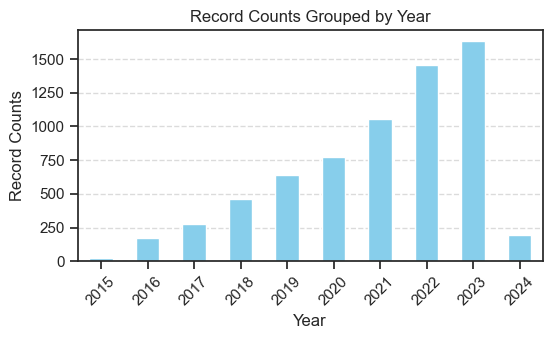

In [147]:
record_counts = df['year_added'].value_counts().sort_index()

# Plot the record counts for each year
plt.figure(figsize=(6, 3))
record_counts.plot(kind='bar', color='skyblue')
plt.title('Record Counts Grouped by Year')
plt.xlabel('Year')
plt.ylabel('Record Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 4.2 Data distribution over production countries

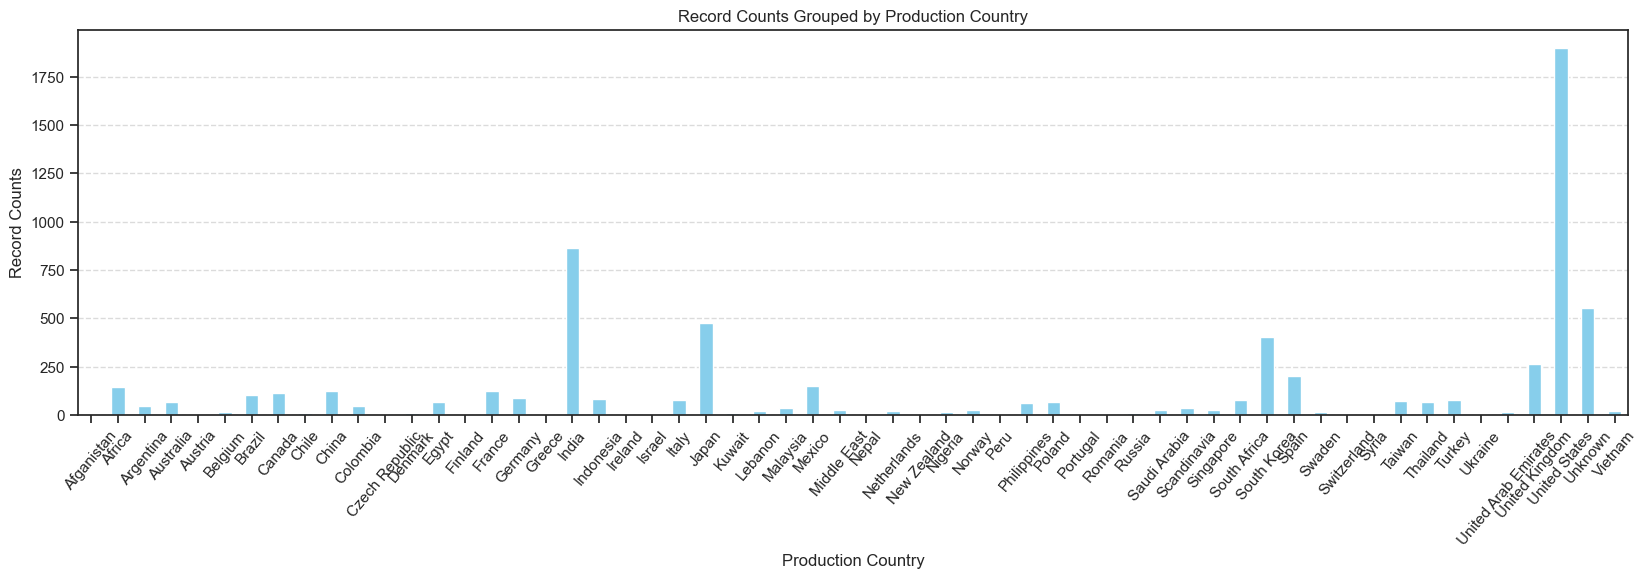

In [148]:
record_counts = df['production_country'].value_counts().sort_index()

# Plot the record counts for each year
plt.figure(figsize=(20, 5))
record_counts.plot(kind='bar', color='skyblue')
plt.title('Record Counts Grouped by Production Country')
plt.xlabel('Production Country')
plt.ylabel('Record Counts')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 4.2 Data distribution over rating

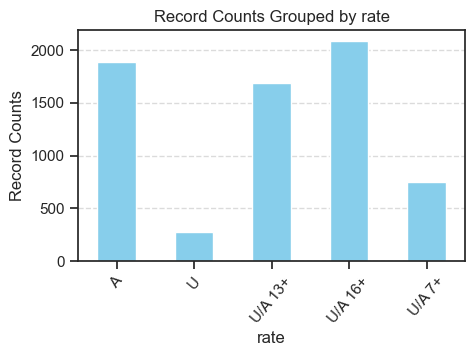

In [149]:
record_counts = df['rating'].value_counts().sort_index()

# Plot the record counts for each year
plt.figure(figsize=(5, 3))
record_counts.plot(kind='bar', color='skyblue')
plt.title('Record Counts Grouped by rate')
plt.xlabel('rate')
plt.ylabel('Record Counts')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 4.3 Most used words in name

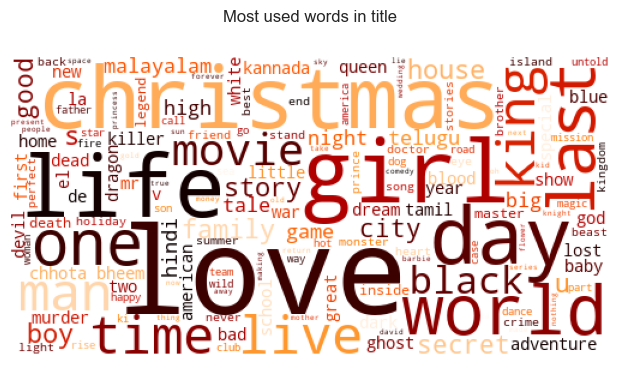

In [150]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS 

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 250,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 6,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.title('Most used words in title', fontsize = 12, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

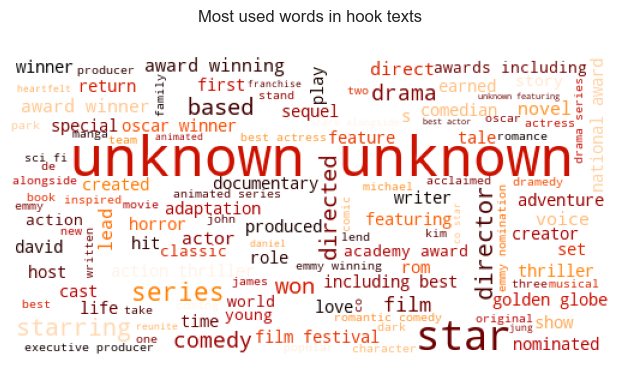

In [298]:
# Create a string to store all the words.
comment_words = ''
# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.hook_text:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 250,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 6,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.title('Most used words in hook texts', fontsize = 12, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### 4.3 Most used words in mood tag

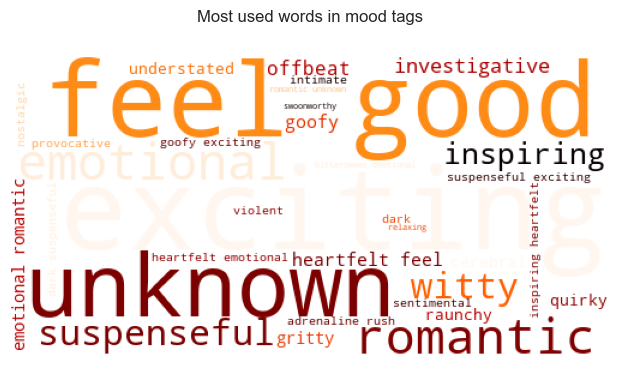

In [151]:
# Create a string to store all the words.
comment_words = ''
# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.mood_tag:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 250,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 6,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.title('Most used words in mood tags', fontsize = 12, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## 5.0 Feature Engineering

##### 5.1.Creating one column using selected features

In [183]:
df['selected_data'] = df['director'] +', '+ df['director'] +', '+ df['genre']+', '+df['rating'] +', '+ df['production_country'] +', '+ df['description']
df['selected_data'][10]

"Unknown, Unknown, Romance, U/A 16+, Japan, Nanase fell in love with Dr. Tendo five years ago. Now she's a nurse and ready to meet him again. But he's nothing like the nice guy she thought he was!"

## 6.0 Text Preprocessing

#### 6.1 Remove stop words

In [184]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
df['selected_data'] = df['selected_data'].apply(stopwords)
df['selected_data'][10]

"unknown, unknown, romance, u/a 16+, japan, nanase fell love dr. tendo five years ago. nurse ready meet again. he's nothing like nice guy thought was!"

#### 6.2 Remove punctuations

In [185]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['selected_data'] = df['selected_data'].apply(remove_punctuation)
df['selected_data'][10]

'unknown unknown romance ua 16 japan nanase fell love dr tendo five years ago nurse ready meet again hes nothing like nice guy thought was'

#### 6.3 Stemming

In [186]:
stemmer = SnowballStemmer("english")
def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

df['selected_data'] = df['selected_data'].apply(stemming)
df['selected_data'][10]

'unknown unknown romanc ua 16 japan nanas fell love dr tendo five year ago nurs readi meet again hes noth like nice guy thought was'

#### 6.4 Vectorizing the Text

In [204]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing
# fit the vectorizer using the text data
tfidf.fit(df['selected_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

print(len(dictionary))
vector = tfidf.transform(df['selected_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

10000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (6685, 10000)
datatype : <class 'numpy.ndarray'>


## 7.0 Dimensionality Reduction

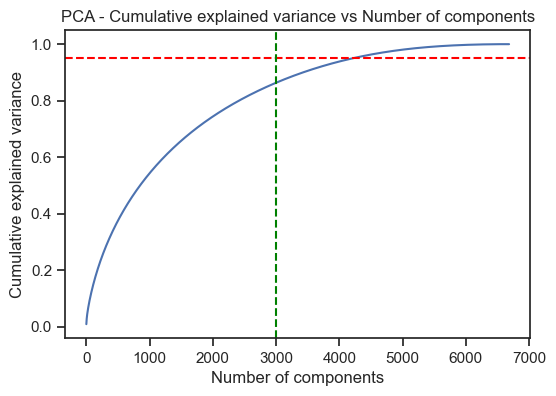

In [206]:
pca = PCA()
pca.fit(vector)

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.95, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()


In [207]:
pca = PCA(n_components=4500)
pca.fit(vector)
X = pca.transform(vector)
X.shape

(6685, 4500)

## 8.0 Implementaion Of Clustering

### 8.1 K-Means Clustering

#### 8.1.1 Elbow Method to find the optimal K value

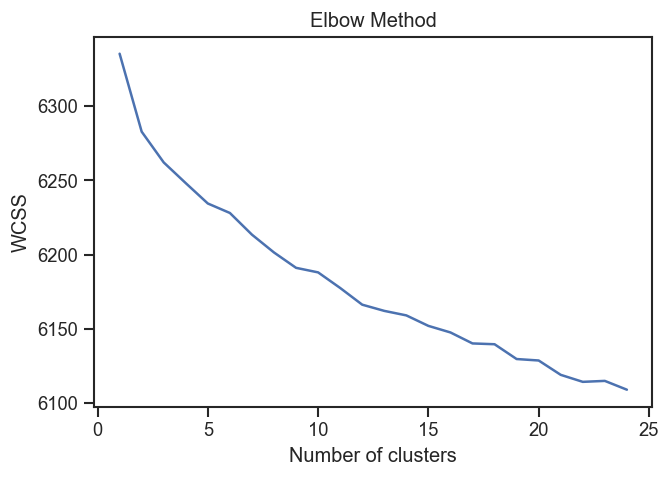

In [239]:
plt.figure(figsize=(6,4), dpi=120)
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 8.1.2. Silhouette Score to find the optimal K value

Optimal number of clusters (k): 20


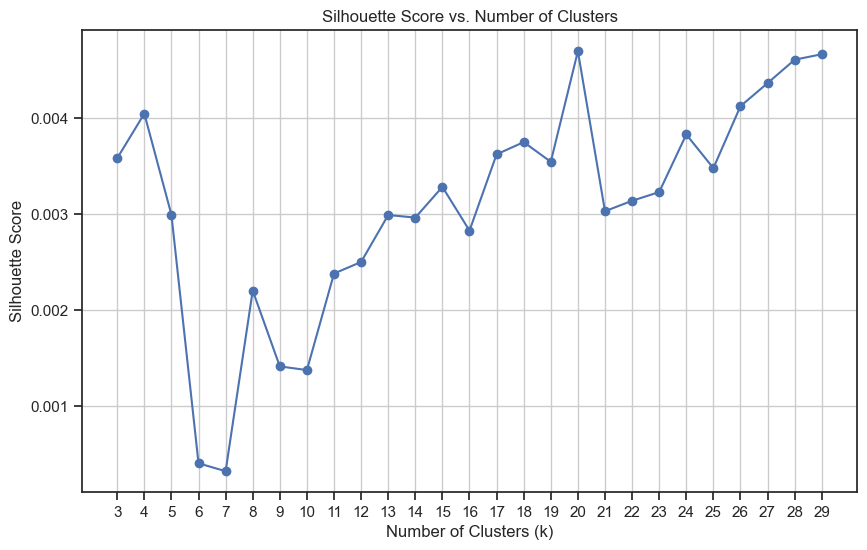

In [236]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(3, 30) 
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Initialize k-means clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Find the optimal k that maximizes the silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters (k):", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### 8.1.3 Implement K means clustering using K = 20

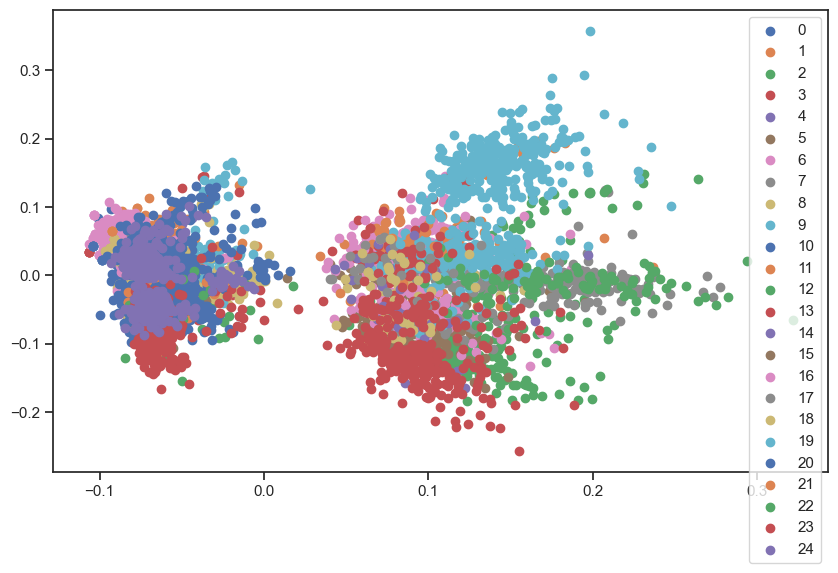

In [233]:
plt.figure(figsize=(10,6))

kmeans= KMeans(n_clusters=20, init= 'k-means++')
kmeans.fit(X)


#predict the labels of clusters.
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [297]:
print(kmeans.cluster_centers_)


[[-4.18002085e-02  1.75883209e-02  1.24074813e-03 ... -9.90839056e-06
  -3.78105337e-06 -5.31473167e-04]
 [ 1.25475019e-01 -9.07850141e-02  1.06581910e-01 ...  3.26294177e-05
  -1.95458198e-04 -5.44147510e-05]
 [ 1.02470870e-02  1.57202312e-02 -1.48056330e-02 ...  2.15225444e-04
   3.28156720e-04 -1.47303152e-04]
 ...
 [-4.07777703e-02 -5.13242932e-02  1.69400075e-02 ... -2.06113955e-04
   1.31140824e-04  4.30547083e-05]
 [-1.59270931e-02  2.29725068e-04  4.86235058e-03 ...  1.11308895e-04
   2.91309462e-04  2.19346474e-04]
 [-3.34436281e-02  6.28953072e-03 -3.56453627e-03 ...  1.92096253e-04
   1.68505652e-04  2.81918496e-04]]


#### 8.1.4 Evaluate the clusters using Silhouette score

In [238]:
# Evaluate clustering using silhouette score
km = KMeans (n_clusters=20, random_state=5)
preds = km.fit_predict(X)
centers = km.cluster_centers_

score = silhouette_score(X, preds, metric='euclidean')
print ("Silhouette score is {}".format(score))


Silhouette score is 0.00481992436142162


#### 8.1.5 Adding Cluster number to dataframe

In [241]:
df['kmeans_cluster'] = kmeans.labels_
df.head()

showid                    name      type   rating  duration  \
0  81607354        A Killer Paradox  TVSeries        A  1 Season   
1  81616617                   Ashes     Movie        A    1.6667   
2  81732726                Bhakshak     Movie        A      2.25   
3  81611991  Lover, Stalker, Killer     Movie  U/A 16+       1.5   
4  70305903            Interstellar     Movie  U/A 13+    2.8167   

                                         description hook_text        genre  \
0  When one accidental killing leads to another, ...   Unknown     Thriller   
1  From an intoxicating fantasy to a dangerous af...   Unknown        Drama   
2  A struggling local journalist begins a dogged ...   Unknown        Drama   
3  In this twisting documentary, a mechanic tries...   Unknown  Documentary   
4  With humanity teetering on the brink of extinc...   Unknown       Sci-Fi   

  release_date                         mood_tag  ...  \
0   2024-02-09              Offbeat;Suspenseful  ...   
1   2024-02-09  Psychological;Intimate;Romantic  ...   
2   2024-02-09                           Gritty  ...   
3   2024-02-09                          Unknown  ...   
4   2024-02-09            Mind-Bending;Cerebral  ...   

                                               audio                subtitles  \
0                                            Unknown                  Unknown   
1  English;Turkish - Audio Description;Turkish [O...  English;English;Turkish   
2  English;Hindi - Audio Description;Hindi [Origi...    English;English;Hindi   
3     English - Audio Description;English [Original]                  English   
4                                 English [Original]            English;Hindi   

                                                tags  \
0  Korean;Crime TV Shows;K-dramas based on Webtoo...   
1                     Turkish;Dramas;Romantic Movies   
2  Hindi-Language Movies;Bollywood Movies;Crime M...   
3  Documentaries;Crime Movies;True Crime Document...   
4  Sci-Fi Movies;Dramas;Action & Adventure Movies...   

                                   similar_titles_id production_country  \
0  81444051;81461539;81011211;81640988;80990668;8...        South Korea   
1  81732726;81256740;81671215;81637260;81566662;8...             Turkey   
2  81671215;81637260;81725616;81637261;81740214;8...              India   
3  81671836;81130130;81620852;81607097;81212487;8...            Unknown   
4  70131314;81198930;80117456;80023689;80244645;8...      United States   

  day_added year_added month_added  \
0         9       2024           2   
1         9       2024           2   
2         9       2024           2   
3         9       2024           2   
4         9       2024           2   

                                       selected_data  kmeans_cluster  
0  unknown unknown thriller a south korea one acc...               6  
1  erdem tepegöz erdem tepegöz drama a turkey int...               9  
2  pulkit pulkit drama a india struggl local jour...               8  
3  sam hobkinson sam hobkinson documentari ua 16 ...              12  
4  christoph nolan christoph nolan scifi ua 13 un...               5  

[5 rows x 23 columns]

#### 8.1.6 Creating word clouds for clusters

cluster 0


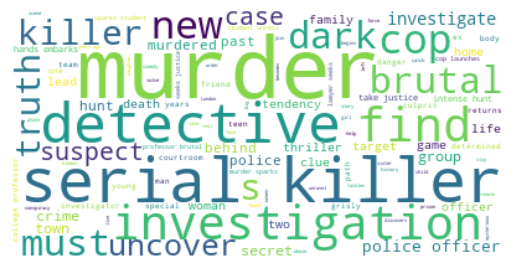

cluster 1


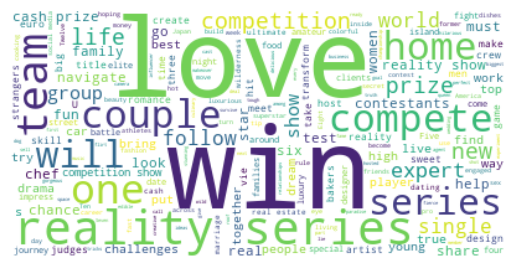

cluster 2


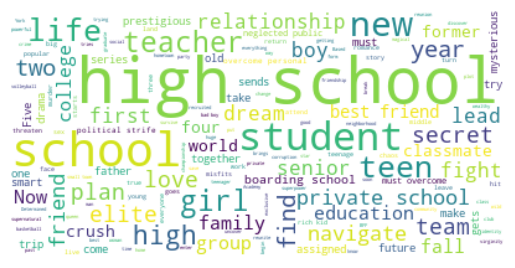

cluster 3


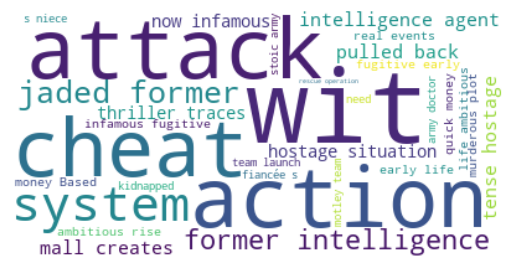

cluster 4


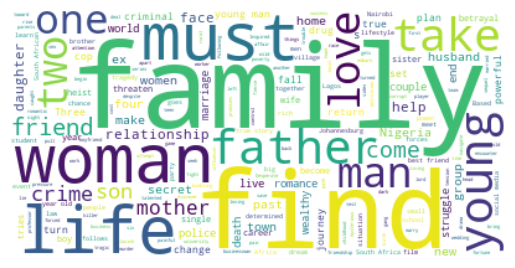

cluster 5


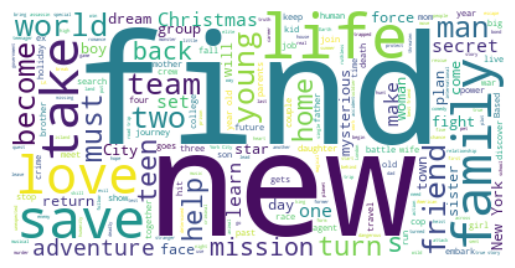

cluster 6


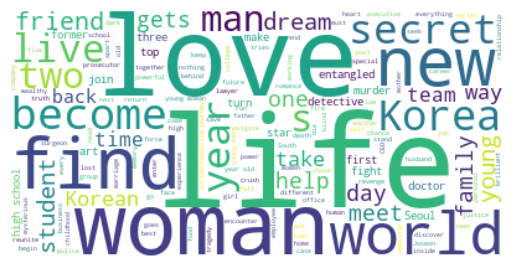

cluster 7


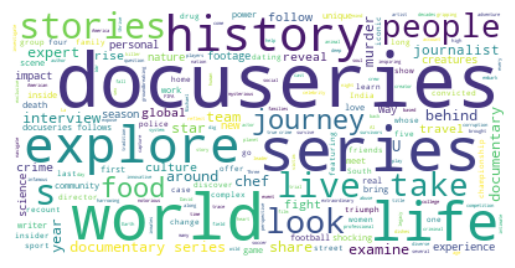

cluster 8


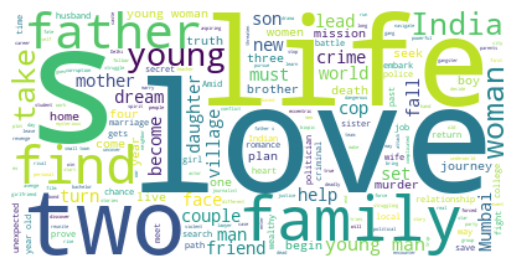

cluster 9


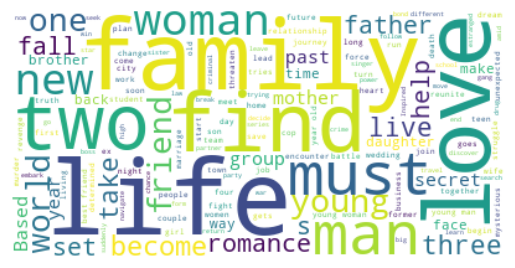

cluster 10


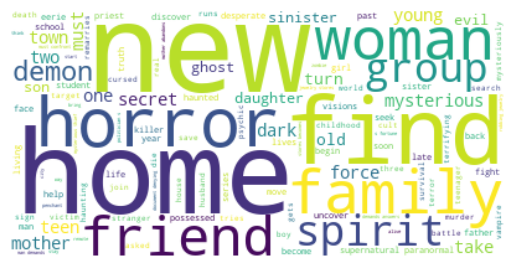

cluster 11


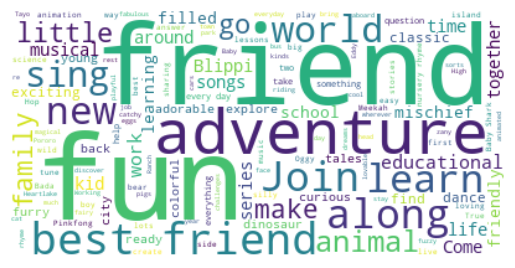

cluster 12


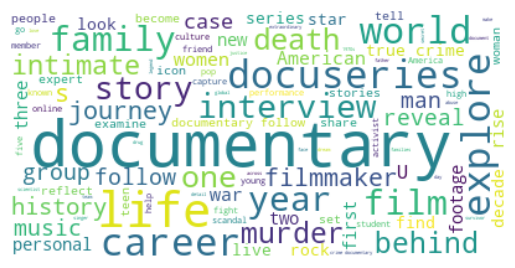

cluster 13


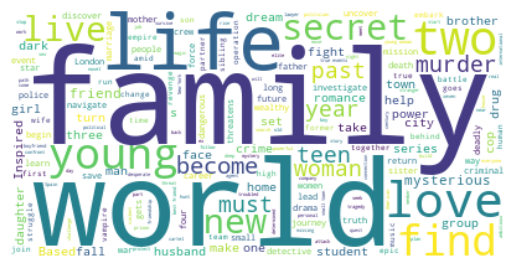

cluster 14


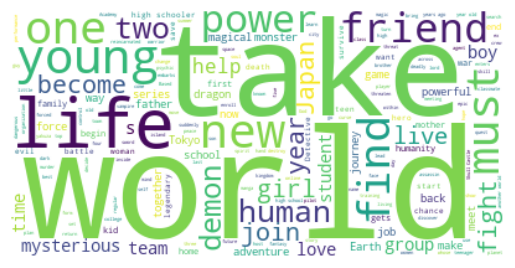

cluster 15


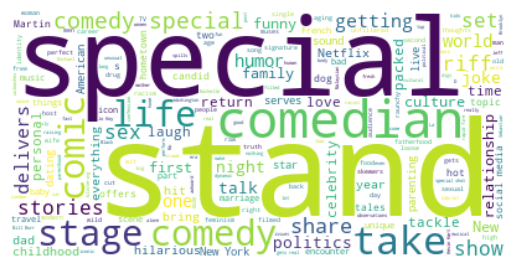

cluster 16


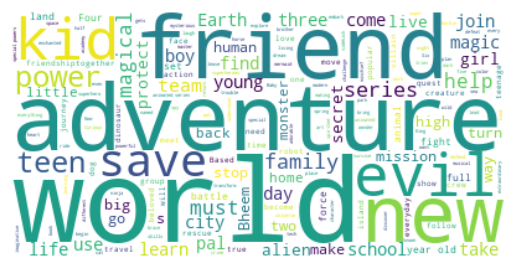

cluster 17


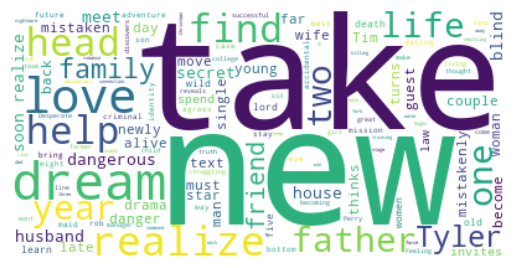

cluster 18


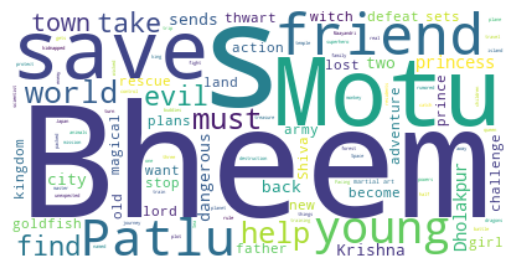

cluster 19


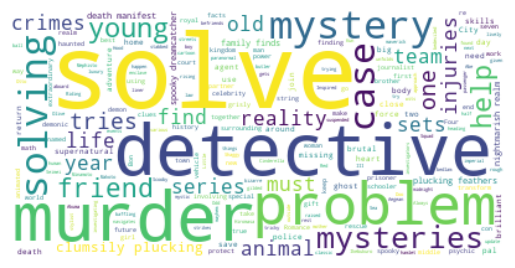

In [244]:
def kmeans_worldcloud(cluster_number, column_name):
  

  netflix_df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[df['kmeans_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


for i in range(20):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

## 9.0 Generate Reccommendations

In [246]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
     
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)
     
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.00987029, 0.01103681, ..., 0.00115889, 0.00245577,
        0.00296559],
       [0.00987029, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01103681, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00115889, 0.        , 0.        , ..., 1.        , 0.0038757 ,
        0.00108213],
       [0.00245577, 0.        , 0.        , ..., 0.0038757 , 1.        ,
        0.00758685],
       [0.00296559, 0.        , 0.        , ..., 0.00108213, 0.00758685,
        1.        ]])

In [247]:
# veryfying index
df[['showid', 'name', 'selected_data']]

showid                            name  \
0     81607354                A Killer Paradox   
1     81616617                           Ashes   
2     81732726                        Bhakshak   
3     81611991          Lover, Stalker, Killer   
4     70305903                    Interstellar   
...        ...                             ...   
6689  80046348            Care Bears & Cousins   
6690  70308278                    Mission Blue   
6691  70264888                    Black Mirror   
6692  80049065                  W/ Bob & David   
6693  80058424  John Mulaney: The Comeback Kid   

                                          selected_data  
0     unknown unknown thriller a south korea one acc...  
1     erdem tepegöz erdem tepegöz drama a turkey int...  
2     pulkit pulkit drama a india struggl local jour...  
3     sam hobkinson sam hobkinson documentari ua 16 ...  
4     christoph nolan christoph nolan scifi ua 13 un...  
...                                                 ...  
6689  unknown unknown kid u unknown whole huggabl ga...  
6690  robert nixonfish steven robert nixonfish steve...  
6691  unknown unknown drama a unit state twist tale ...  
6692  unknown unknown comedi ua 16 unit state dishon...  
6693  rhys thoma rhys thoma comedi ua 16 unknown arm...  

[6685 rows x 3 columns]

In [256]:
df.shape

(6685, 23)

In [257]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['showid', 'name', 'selected_data']]

showid                            name  \
0     81607354                A Killer Paradox   
1     81616617                           Ashes   
2     81732726                        Bhakshak   
3     81611991          Lover, Stalker, Killer   
4     70305903                    Interstellar   
...        ...                             ...   
6680  80046348            Care Bears & Cousins   
6681  70308278                    Mission Blue   
6682  70264888                    Black Mirror   
6683  80049065                  W/ Bob & David   
6684  80058424  John Mulaney: The Comeback Kid   

                                          selected_data  
0     unknown unknown thriller a south korea one acc...  
1     erdem tepegöz erdem tepegöz drama a turkey int...  
2     pulkit pulkit drama a india struggl local jour...  
3     sam hobkinson sam hobkinson documentari ua 16 ...  
4     christoph nolan christoph nolan scifi ua 13 un...  
...                                                 ...  
6680  unknown unknown kid u unknown whole huggabl ga...  
6681  robert nixonfish steven robert nixonfish steve...  
6682  unknown unknown drama a unit state twist tale ...  
6683  unknown unknown comedi ua 16 unit state dishon...  
6684  rhys thoma rhys thoma comedi ua 16 unknown arm...  

[6685 rows x 3 columns]

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'showid'], inplace=True)


In [260]:
recommender_df

name      type   rating   duration  \
0                   A Killer Paradox  TVSeries        A   1 Season   
1                              Ashes     Movie        A     1.6667   
2                           Bhakshak     Movie        A       2.25   
3             Lover, Stalker, Killer     Movie  U/A 16+        1.5   
4                       Interstellar     Movie  U/A 13+     2.8167   
...                              ...       ...      ...        ...   
6680            Care Bears & Cousins  TVSeries        U  2 Seasons   
6681                    Mission Blue     Movie   U/A 7+     1.5667   
6682                    Black Mirror  TVSeries        A  6 Seasons   
6683                  W/ Bob & David  TVSeries  U/A 16+   1 Season   
6684  John Mulaney: The Comeback Kid     Movie  U/A 16+     1.0167   

                                            description  \
0     When one accidental killing leads to another, ...   
1     From an intoxicating fantasy to a dangerous af...   
2     A struggling local journalist begins a dogged ...   
3     In this twisting documentary, a mechanic tries...   
4     With humanity teetering on the brink of extinc...   
...                                                 ...   
6680  The whole huggable gang is back, bringing tale...   
6681  This documentary follows oceanographer Sylvia ...   
6682  Twisted tales run wild in this mind-bending an...   
6683  After being dishonorably discharged from the N...   
6684  Armed with boyish charm and a sharp wit, the f...   

                                              hook_text        genre  \
0                                               Unknown     Thriller   
1                                               Unknown        Drama   
2                                               Unknown        Drama   
3                                               Unknown  Documentary   
4                                               Unknown       Sci-Fi   
...                                                 ...          ...   
6680                                            Unknown         Kids   
6681  Oscar-winning director James Cameron ("Titanic...  Documentary   
6682  This cult-favorite series has won six Emmys, i...        Drama   
6683                                            Unknown       Comedy   
6684                                            Unknown       Comedy   

     release_date                         mood_tag  \
0      2024-02-09              Offbeat;Suspenseful   
1      2024-02-09  Psychological;Intimate;Romantic   
2      2024-02-09                           Gritty   
3      2024-02-09                          Unknown   
4      2024-02-09            Mind-Bending;Cerebral   
...           ...                              ...   
6680   2015-11-06                          Unknown   
6681   2015-11-30            Provocative;Inspiring   
6682   2015-11-16             Mind-Bending;Ominous   
6683   2015-11-13              Absurd;Witty;Quirky   
6684   2015-11-13                            Witty   

                                                 actors  ...  \
0                  Choi Woo-shik;Son Suk-ku;Lee Hee-jun  ...   
1     Funda Eryiğit;Alperen Duymaz;Mehmet Günsür;Nur...  ...   
2     Bhumi Pednekar;Sanjay Mishra;Aditya Srivastava...  ...   
3                                               Unknown  ...   
4     Matthew McConaughey;Anne Hathaway;Jessica Chas...  ...   
...                                                 ...  ...   
6680  Michael Sinterniklaas;Michaela Dean;Doug Erhol...  ...   
6681  James Cameron;Michael deGruy;Sylvia Earle;Bryc...  ...   
6682  Jesse Plemons;Cristin Milioti;Jimmi Simpson;Mi...  ...   
6683  David Cross;Bob Odenkirk;John Ennis;Jay Johnst...  ...   
6684                                       John Mulaney  ...   

                                                  audio  \
0                                               Unknown   
1     English;Turkish - Audio Description;Turkish [O...   
2     English;Hindi - 

In [261]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        , -0.01541799,  0.00409464, ..., -0.0032004 ,
        -0.01059459, -0.00877673],
       [-0.01541799,  1.        ,  0.00537994, ..., -0.00647849,
        -0.0242228 , -0.00409295],
       [ 0.00409464,  0.00537994,  1.        , ..., -0.01067793,
        -0.02742235, -0.00709362],
       ...,
       [-0.0032004 , -0.00647849, -0.01067793, ...,  1.        ,
         0.00982864, -0.01067543],
       [-0.01059459, -0.0242228 , -0.02742235, ...,  0.00982864,
         1.        ,  0.01094204],
       [-0.00877673, -0.00409295, -0.00709362, ..., -0.01067543,
         0.01094204,  1.        ]])

In [294]:
def recommend(movie):
    
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['name'] == movie].index[0]
    #print(index)

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    #print(distances[1:11])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df['name'].iloc[i[0]])
        

In [295]:
recommend('Interstellar')

If you liked 'Interstellar', you may also enjoy: 

Tenet
Inception
Batman Begins
The Dark Knight
The Dark Knight Rises
Prime
We Have a Ghost
The Old Ways
Mission: Impossible - Fallout
Mission: Impossible - Rogue Nation
